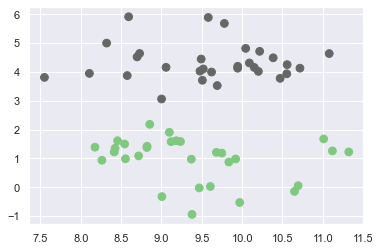

In [24]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=60, centers=2,
                  random_state=4, cluster_std=0.80)
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap = 'Accent');

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

In [13]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [26]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

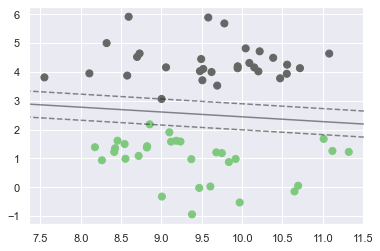

In [27]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Accent')
plot_svc_decision_function(model);

In [34]:
toy_x_train = np.array([[0.7, -0.7],
                       [-0.7, -0.7],
                       [0, 0.7],
                       [0, 0]
                      ])
# create class-labels of shape (4,)
toy_y_train = np.array([0, 1, 2, 3])

# define class colors 
toy_label_colors = {0: 'b',  # class 0 is blue
                    1: 'y',  # class 1 is yellow 
                    2: 'g',  # class 2 is green
                    3: 'r'}  # class 3 is is red

# Create a set of densly sampled points in the range [-1, 1]
xv, yv = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
toy_x_test = np.stack((xv, yv), axis=-1).reshape(-1, 2)

In [35]:
def plot_2d_data(x_train, y_train, x_test, test_predictions=np.empty(0)):
    """ Plot data color coded by class.
    
    Parameters
    ----------
    x_train : numpy.ndarray
        Training data of shape (N, 2).
    
    y_train : numpy.ndarray
        Training labels of shape (N,).
    
    x_test : numpy.ndarray
        Test data of shape (M, 2).
    
    test_predictions : numpy.ndarray, optional (default=np.array([]))
        Test predictions. If no argument is given the points 
        `x_test` are given the default color code.
    """
    # if no test predictions are given, use the default color
    # otherwise, find the corresponding class color
    if len(test_predictions) == 0:
        test_pt_colors = 'C0'
    else:
        test_pt_colors = [toy_label_colors[l] for l in test_predictions]
    fig, ax = plt.subplots()
    ax.scatter(*x_test.T, c=test_pt_colors, alpha=0.1)
    ax.scatter(*x_train.T, c=[toy_label_colors[l] for l in y_train])    

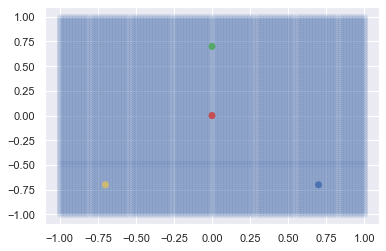

In [36]:
plot_2d_data(toy_x_train, toy_y_train, toy_x_test)


In [37]:
dists = compute_distances(toy_x_test, toy_x_train)
predictions = predict(dists, toy_y_train)
plot_2d_data(toy_x_train, toy_y_train, toy_x_test, predictions)

NameError: name 'compute_distances' is not defined

In [38]:
def generate_noisy_clusters(x, y, std=0.2, n_cluster_points=100):
    """ Generate clusters around data points by adding random noise.
    
    Parameters
    ----------
    x : numpy.ndarray
        Data points of shape (N, 2).
        
    y : numpy.ndarray
        Labels of data points `x` of shape (N,).
        
    std : float
        Standard deviation of noise used to generate clusters.
        
    n_cluster_points : int, optional (default=100)
        Number of data points to generate around each point in `x`.
        
    Returns
    -------
    Tuple[numpy.ndarray, numpy.ndarray]
        Arrays of shapes (`n_cluster_points`*N, 2) and (`n_cluster_points`*N,)
        Containing the data clusters and their labels.
    """
    toy_clusters_x = (np.repeat(x, n_cluster_points, axis=0) \
                      + std * np.random.randn(n_cluster_points*x.shape[0], 2)).clip(-1, 1)
    toy_clusters_y = np.repeat(y, n_cluster_points, axis=0)
    
    return toy_clusters_x, toy_clusters_y

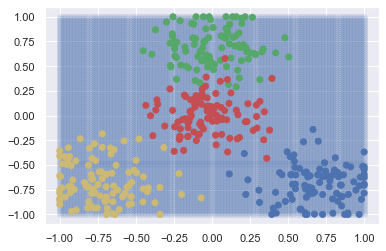

In [39]:
n_cluster_points = 100
moise_std = 0.2  # standard deviation of perturbations 
toy_clusters_x, toy_clusters_y = generate_noisy_clusters(toy_x_train, toy_y_train, moise_std, 
                                                         n_cluster_points)
# run this cell
plot_2d_data(toy_clusters_x, toy_clusters_y, toy_x_test)

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
df = pd.read_csv("chbmit_preprocessed_data.csv")
df.head()

,# FP1-F7,C3-P3,C4-P4,CZ-PZ,F3-C3,F4-C4,F7-T7,F8-T8,FP1-F3,FP2-F4,...,P3-O1,P4-O2,P7-O1,P7-T7,P8-O2,T7-FT9,T7-P7,T8-P8-0,T8-P8-1,Outcome
0,0.000020,0.000010,0.000022,0.000037,0.000032,0.000035,0.000016,0.000046,-0.000007,0.000043,...,0.000024,-0.000030,0.000010,-0.000011,-0.000037,0.000008,0.000012,0.000021,0.000021,0.0
1,0.000022,0.000008,0.000021,0.000039,0.000030,0.000032,0.000015,0.000039,-0.000006,0.000042,...,0.000026,-0.000017,0.000012,-0.000008,-0.000029,0.000010,0.000009,0.000023,0.000023,0.0
2,0.000021,0.000012,0.000021,0.000040,0.000025,0.000030,0.000013,0.000036,-0.000006,0.000040,...,0.000027,-0.000018,0.000014,-0.000009,-0.000034,0.000012,0.000009,0.000027,0.000027,0.0
3,0.000019,0.000012,0.000021,0.000039,0.000023,0.000028,0.000013,0.000035,-0.000008,0.000036,...,0.000030,-0.000024,0.000015,-0.000009,-0.000042,0.000009,0.000010,0.000033,0.000033,0.0
4,0.000019,0.000012,0.000021,0.000036,0.000023,0.000024,0.000012,0.000024,-0.000009,0.000032,...,0.000032,-0.000014,0.000017,-0.000008,-0.000031,0.000009,0.000008,0.000035,0.000035,0.0


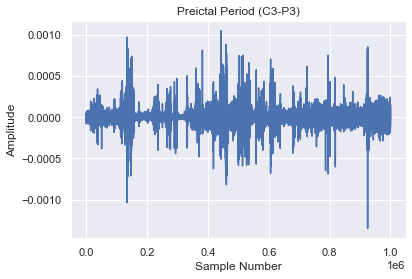

In [42]:
x = df['C3-P3']
x[:1000000].plot()
plt.xlabel("Sample Number")
plt.ylabel("Amplitude")
plt.title("Preictal Period (C3-P3)")
plt.show()

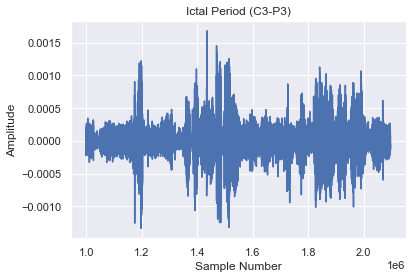

In [43]:
x = df['C3-P3']
x[1000000:].plot()
plt.xlabel("Sample Number")
plt.ylabel("Amplitude")
plt.title("Ictal Period (C3-P3)")
plt.show()

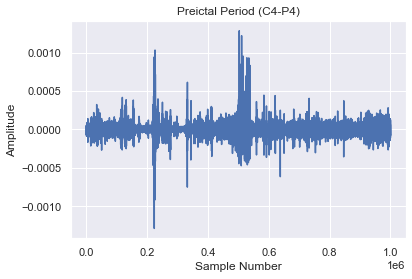

In [44]:
x = df['C4-P4']
x[:1000000].plot()
plt.xlabel("Sample Number")
plt.ylabel("Amplitude")
plt.title("Preictal Period (C4-P4)")
plt.show()

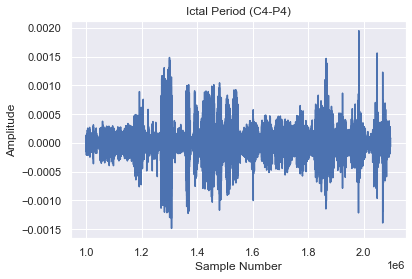

In [45]:
x = df['C4-P4']
x[1000000:].plot()
plt.xlabel("Sample Number")
plt.ylabel("Amplitude")
plt.title("Ictal Period (C4-P4)")
plt.show()

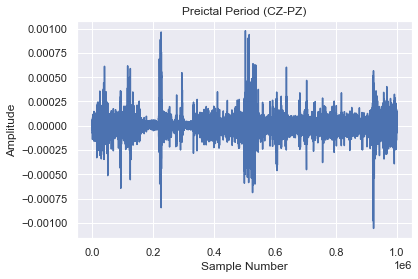

In [46]:
x = df['CZ-PZ']
x[:1000000].plot()
plt.xlabel("Sample Number")
plt.ylabel("Amplitude")
plt.title("Preictal Period (CZ-PZ)")
plt.show()

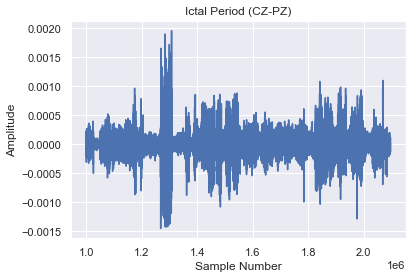

In [47]:
x = df['CZ-PZ']
x[1000000:].plot()
plt.xlabel("Sample Number")
plt.ylabel("Amplitude")
plt.title("Ictal Period (CZ-PZ)")
plt.show()

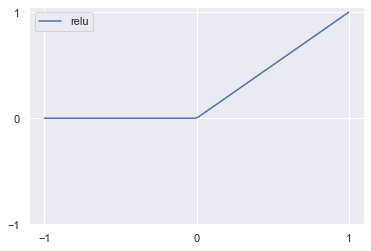

In [49]:
x_values = np.linspace(-1, 1, 100)
y_values = np.maximum(0, x_values) 

plt.plot(x_values, y_values, label = 'relu')
plt.xticks([-1,0,1])
plt.yticks([-1,0,1])
plt.legend()
plt.show()

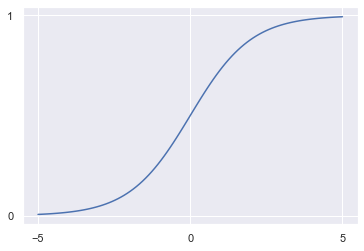

In [50]:
x_values = np.linspace(-5, 5, 100)
y_values = 1 / (1 + np.exp(-x_values))

plt.plot(x_values, y_values, label = 'sigmoid')
plt.xticks([-5,0,5])
plt.yticks([0,1])
plt.show()

In [71]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(12, input_shape=(4,24), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 4, 12)             300       
_________________________________________________________________
dense_16 (Dense)             (None, 4, 8)              104       
_________________________________________________________________
dense_17 (Dense)             (None, 4, 1)              9         
Total params: 413
Trainable params: 413
Non-trainable params: 0
_________________________________________________________________


In [63]:
y = df.iloc[:,24:]
X = df.iloc[:,:24]

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

In [72]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_crossentropy','accuracy'])

In [75]:
history = model.fit(X_train, y_train, epochs=50, batch_size=10)

Epoch 1/50


ValueError: in user code:

    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:755 train_step
        loss = self.compiled_loss(
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/compile_utils.py:203 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:152 __call__
        losses = call_fn(y_true, y_pred)
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:256 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:1608 binary_crossentropy
        K.binary_crossentropy(y_true, y_pred, from_logits=from_logits), axis=-1)
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/backend.py:4979 binary_crossentropy
        return nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/nn_impl.py:173 sigmoid_cross_entropy_with_logits
        raise ValueError("logits and labels must have the same shape (%s vs %s)" %

    ValueError: logits and labels must have the same shape ((None, 1) vs (None, 0))


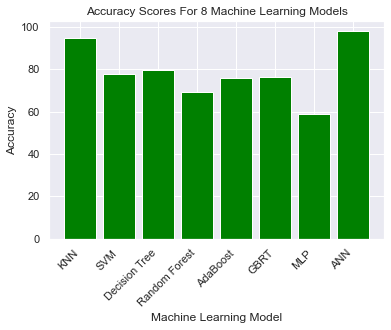

In [82]:
data = {'KNN':94.53, 'SVM': 77.81, 'Decision Tree':79.82, 'Random Forest':69.29, 'AdaBoost':75.97, 'GBRT':76.10, 'MLP':58.95, 'ANN':97.78}
models = list(data.keys())
accuracy = list(data.values())
plt.bar(models, accuracy, color = 'green')
plt.xlabel("Machine Learning Model")
plt.ylabel("Accuracy")
plt.title("Accuracy Scores For 8 Machine Learning Models")
plt.xticks(rotation=45, ha='right')
plt.show()

Text(0.5, 1.0, 'C3-P3')

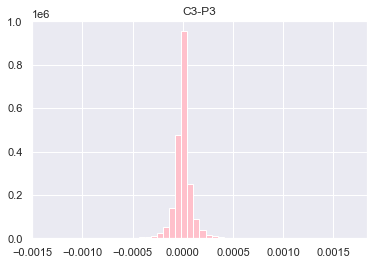

In [87]:
plt.hist(df['C3-P3'], bins = 50, color = 'pink', linewidth=1.0)
plt.title('C3-P3')

Feature: 0, Score: 0.03171
Feature: 1, Score: 0.03339
Feature: 2, Score: 0.19222
Feature: 3, Score: 0.04383
Feature: 4, Score: 0.03225
Feature: 5, Score: 0.03204
Feature: 6, Score: 0.05711
Feature: 7, Score: 0.02859
Feature: 8, Score: 0.03165
Feature: 9, Score: 0.02695
Feature: 10, Score: 0.02683
Feature: 11, Score: 0.03586
Feature: 12, Score: 0.12469
Feature: 13, Score: 0.04467
Feature: 14, Score: 0.03167
Feature: 15, Score: 0.03197
Feature: 16, Score: 0.03025
Feature: 17, Score: 0.02472
Feature: 18, Score: 0.02725
Feature: 19, Score: 0.05499
Feature: 20, Score: 0.02668
Feature: 21, Score: 0.01665
Feature: 22, Score: 0.01402


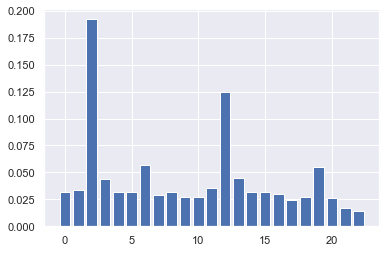

In [89]:
y = df.iloc[:,23:]
X = df.iloc[:,:23]
# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
# define dataset
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [90]:
df = df.drop('P7-T7',1)

In [91]:
df = df.drop('T7-P7',1)

In [92]:
df = df.drop('T8-P8-0',1)

In [93]:
df = df.drop('T8-P8-1',1)

In [94]:
y = df.iloc[:,19:]
X = df.iloc[:,:19]

     feature       VIF
0   # FP1-F7  5.130329
1      C3-P3  1.770255
2      C4-P4  2.398369
3      CZ-PZ  1.801338
4      F3-C3  4.004276
5      F4-C4  4.046975
6      F7-T7  5.114859
7      F8-T8  4.697553
8     FP1-F3  3.899545
9     FP2-F4  4.166987
10    FP2-F8  4.950729
11   FT10-T8  2.532596
12  FT9-FT10  3.682579
13     FZ-CZ  2.832281
14     P3-O1  2.263395
15     P4-O2  2.491768
16     P7-O1  2.044176
17     P8-O2  1.849968
18    T7-FT9  3.299351


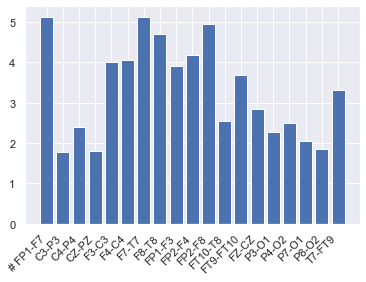

In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)
pyplot.bar([x for x in (vif_data["feature"])], vif_data["VIF"])
plt.xticks(rotation=45, ha='right')
pyplot.show()

In [ ]:
df = df.drop('# FP1-F7',1)

df = df.drop('FP2-F8',1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)